<a href="https://colab.research.google.com/github/EnesAgirman/Machine_Learning/blob/main/Codes/Linear_Regression_Normal_Equations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

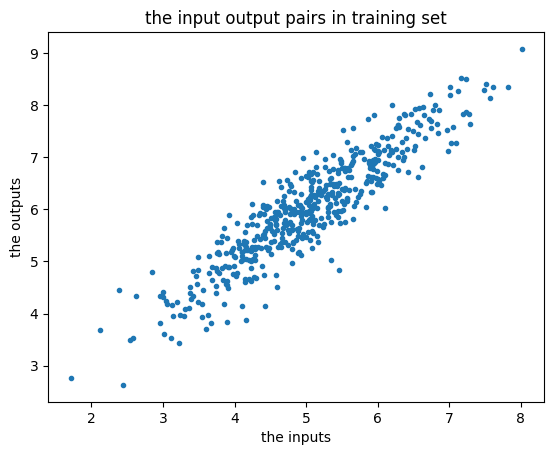

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
from IPython.display import clear_output
from numpy.ma.core import squeeze

# The code used in generating the data is taken from https://www.geeksforgeeks.org/ml-mini-batch-gradient-descent-with-python/

# creating data

# Input data size
inputSize = 5000

#The mean on the x axis and the mean on the y axis
mean = np.array([5.0, 6.0])

cov = np.array([[1.0, 1], [1, 1.2]])  # The covariance matrix.
# For more info about the covariance matrix, see: https://www.youtube.com/watch?v=WBlnwvjfMtQ&ab_channel=Serrano.Academy

# Our input data
data = np.random.default_rng(seed=42).multivariate_normal(mean, cov, inputSize)
data = np.hstack((np.ones((data.shape[0], 1)), data))

# visualising data

# get the first 500 points from the first and second dimension of the data
plt.scatter(data[:500, 1], data[:500, 2], marker='.')
plt.title("the input output pairs in training set")
plt.xlabel("the inputs")
plt.ylabel("the outputs")
plt.show()

# The proportion of the data we have that we use for training set. We will use the data not used in training set in the test set
trainProportion = 0.9
trainSplit = int(trainProportion * data.shape[0])

X_train = data[:trainSplit, :2]
Y_train = data[:trainSplit, 2].reshape(-1, 1)

X_test = data[trainSplit:, :2]
Y_test = data[trainSplit:, 2].reshape(-1, 1)

theta = np.matmul(np.matmul(np.linalg.inv(np.matmul(np.transpose(X_train), X_train)), np.transpose(X_train)), Y_train)

In [ ]:
def hypothesis(aTheta, aX):
  '''
  Calculate the hypothesis with given theta and aX taking the dot product of the vectors theta and X
  '''
  result = np.dot(np.squeeze(aTheta), np.squeeze(aX) )
  return result

def calculateAbsMeanPercentageError(aTheta, aX_test, aY_testn, aTestNum, printErrMessage):
  '''
  calculates the absolute mean error of the hypothesis and the output that we are trying to guess
  The hypothesis is calculated by the input X and teh parameter theta. The output we are guessing is given by aY_test
  aTestNum is the number of (aX_test, aY_testn) pairs we are looking at to calculate the error
  '''
  sum = 0 #for calculating the sum of errors by individual (h, y) pairs
  for j in range(aTestNum):
      h = hypothesis(theta, X_test[j])  # the hypothesis formed by inputs and parameters
      sum += abs(h - Y_test[j]) / Y_test[j] # sum the absolute values of errors of each individual (h, y) pairs
  err = sum / aTestNum  # divide the total error by the number of pairs we looked intto to find average error
  if printErrMessage == True:
    print(f"the absolute mean error is % {float(err) * 100}")
  return err



the absolute mean error is % 7.414360081210355


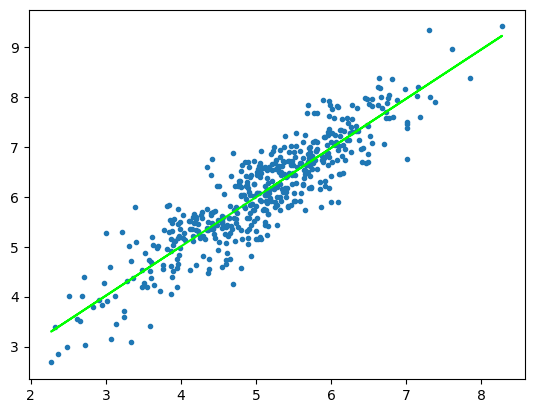

In [ ]:
y_pred = np.matmul(X_test[:, :], theta.reshape(2, 1)) # our hypothesis of Y given X calculated using the theta we found by normal equations

plt.scatter(X_test[:, 1], Y_test[:], marker='.')  #Scatter the (x, y) pairs onto the plot
plt.plot(X_test[:, 1], y_pred, color='lime') # Plot the line given by aFunction

err = calculateAbsMeanPercentageError(theta, X_test, Y_test, 30, True)  # the mean absolute error in our prediction and print the error percentage